In [1]:
%load_ext autoreload
%autoreload 1
%aimport iconsole

import iconsole as ic
from iconsole import run as Run
from iconsole import load as Load
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append(r'/home/zhouw/Codes/GitHub/Misc/Python')
from wiggle import wiggle_2d

In [2]:
ic.setup_update({
    "MODEL_SIZE":"'301   301   1'",
    "MODEL_SPACING":"'10    10    1'",
    "MODEL_SPACING":"'10    10    2'",
    })

ic.setup_update({
    "IS_FREESURFACE": "F",
    "ACQUI_GEOMETRY": "spread",
    "FS":             "'1500 1000  1'",
    "DS":             "'0    500   0'",
    "NS":               2,
    "FR":             "'1500 1500  1'",
    "DR":             "'0    500  0'",
    "NR":               2,
    "IF_HICKS": "F"
    })

ic.setup_update({
    "NT":           1000,
    "DT":           0.004,
    "FPEAK":        6,
    })

ic.setup_update({"IF_USE_CHECKPOINT":"F"})

ic.setup_print()

setup.in will include:
MODEL_SIZE 	 '301   301   1'
MODEL_SPACING 	 '10    10    2'
IS_FREESURFACE 	 F
ACQUI_GEOMETRY 	 spread
FS 	 '1500 1000  1'
DS 	 '0    500   0'
NS 	 2
FR 	 '1500 1500  1'
DR 	 '0    500  0'
NR 	 2
IF_HICKS 	 F
NT 	 1000
DT 	 0.004
FPEAK 	 6
IF_USE_CHECKPOINT 	 F


In [3]:
ic.exedir='/home/zhouw/Codes/GitHub/SeisJIMU/exe/'
Run("FWD")

Writing setup.in ...
Running ...
 MPIWorld info:
  MPI_INIT_THREAD level:           0
  Number of MPI processors:           1
  Max number of OMP threads / processor:           8
 Working directory: (pwd)
/home/zhouw/Codes/GitHub/SeisJIMU/Tools
 Using executable: (ls -l $exe)
lrwxrwxrwx 1 zhouw ondes 14 Aug 30 16:15 /home/zhouw/Codes/GitHub/SeisJIMU/exe/FWD -> fwd_AC_FDSG_O4
 Git Commit: 371d0c4
 Git Branch: future
 Compiler: gfortran v9.3.0
 Version: 9.3.0
 Endianness:         1234
 System date: 11/28/2021
System time: 18:12:20
System timezone: +01:00
                        
   WELCOME TO SeisJIMU FWD MODELING   
 Setup file: setup.in
 DIR_IN is NOT found, take default: ./
 Input directory: ./
 DIR_OUT is NOT found, take default: ./results/
 Output directory:./results/
 Invoked field & propagator modules info : 
Time-domain ISOtropic 2D/3D ACoustic propagation
1st-order Velocity-Stress formulation
Vireux-Levandar Staggered-Grid Finite-Difference (FDSG) method
Cartesian O(x4,t2) stenc

./results/dsyn_0001.su
(1000, 2)


<AxesSubplot:>

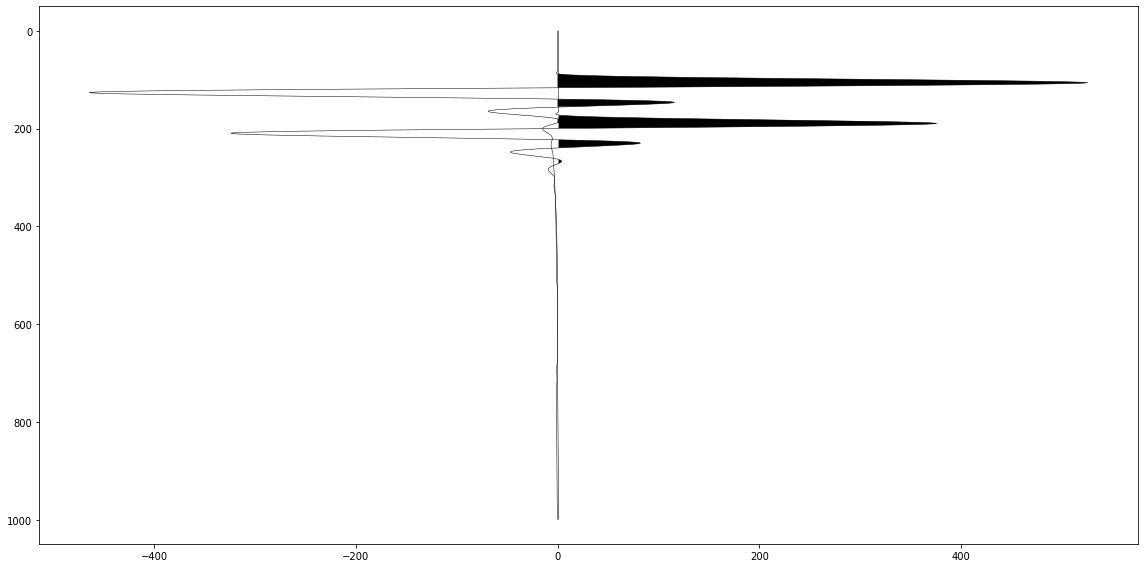

In [4]:
dsyn=Load("dsyn_0001.su")
print(dsyn.shape)

wiggle_2d(np.transpose(dsyn))

./results/dsyn_0001.su
(1000, 2)
319.11060729980466


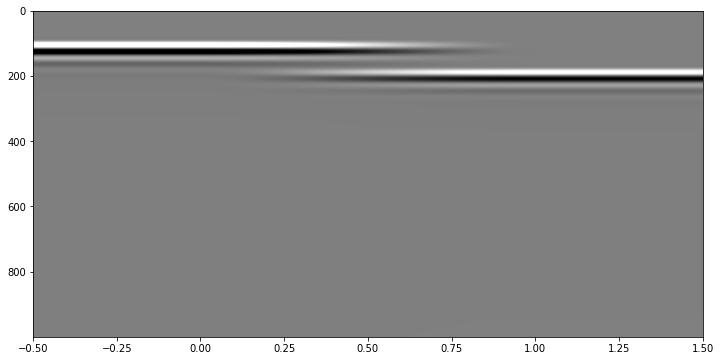

In [5]:
dsyn=Load("dsyn_0001.su")
print(dsyn.shape)

clip=np.percentile(dsyn,99)
print(clip)

plt.figure(figsize=(12,6))
plt.imshow(dsyn,vmin=-clip,vmax=clip, cmap='gray', aspect='auto')

n1=1000 n2=2 d1=0.004000
nt=1000 ntr=2 dt=0.004000
ns=1000
(1000, 2)
319.11060729980466


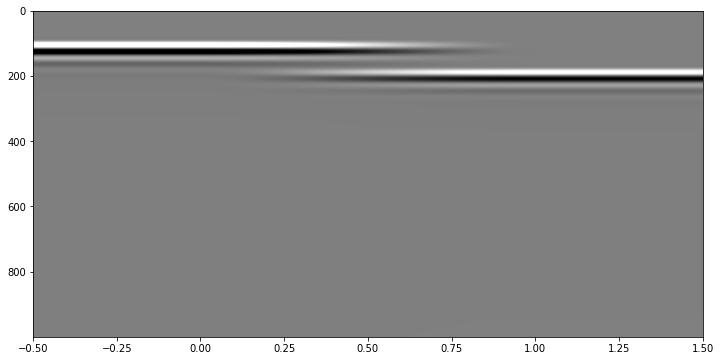

In [6]:
!sustrip < ./results/dsyn_0001.su > temp

dsyn=Load("temp",dir='./',n=[1000,2])
print(dsyn.shape)

clip=np.percentile(dsyn,99)
print(clip)

plt.figure(figsize=(12,6))
plt.imshow(dsyn,vmin=-clip,vmax=clip, cmap='gray', aspect='auto')